In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [3]:
path = 'D:/dataset/playground_Sep2022'
test = pd.read_csv(path + '/test.csv').copy()
train = pd.read_csv(path + '/train.csv').copy()
sample_submission = pd.read_csv(path + '/sample_submission.csv').copy()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [4]:
train

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135


In [5]:
test

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book


In [83]:
from sklearn.preprocessing import LabelEncoder
def change_data(data):
    data['date'] = pd.to_datetime(data['date'])
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    
    data['country'] = LabelEncoder().fit_transform(data['country'])
    data['store'] = LabelEncoder().fit_transform(data['store'])
    data['product'] = LabelEncoder().fit_transform(data['product'])
    return data

train_change = change_data(train)
test_change = change_data(test)
# train_change = pd.get_dummies(train_change, columns = ['country', 'product', 'store'])
# test_change = pd.get_dummies(test_change, columns = ['country', 'product', 'store'])

train_change

,row_id,date,country,store,product,num_sold,year,month,day,dayofweek,quarter
0,0,2017-01-01,0,0,0,663,2017,1,1,6,1
1,1,2017-01-01,0,0,1,615,2017,1,1,6,1
2,2,2017-01-01,0,0,2,480,2017,1,1,6,1
3,3,2017-01-01,0,0,3,710,2017,1,1,6,1
4,4,2017-01-01,0,1,0,240,2017,1,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...
70123,70123,2020-12-31,5,0,3,614,2020,12,31,3,4
70124,70124,2020-12-31,5,1,0,215,2020,12,31,3,4
70125,70125,2020-12-31,5,1,1,158,2020,12,31,3,4
70126,70126,2020-12-31,5,1,2,135,2020,12,31,3,4


In [84]:
test_change

,row_id,date,country,store,product,year,month,day,dayofweek,quarter
0,70128,2021-01-01,0,0,0,2021,1,1,4,1
1,70129,2021-01-01,0,0,1,2021,1,1,4,1
2,70130,2021-01-01,0,0,2,2021,1,1,4,1
3,70131,2021-01-01,0,0,3,2021,1,1,4,1
4,70132,2021-01-01,0,1,0,2021,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...
17515,87643,2021-12-31,5,0,3,2021,12,31,4,4
17516,87644,2021-12-31,5,1,0,2021,12,31,4,4
17517,87645,2021-12-31,5,1,1,2021,12,31,4,4
17518,87646,2021-12-31,5,1,2,2021,12,31,4,4


In [85]:
train_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   row_id     70128 non-null  int64         
 1   date       70128 non-null  datetime64[ns]
 2   country    70128 non-null  int64         
 3   store      70128 non-null  int64         
 4   product    70128 non-null  int64         
 5   num_sold   70128 non-null  int64         
 6   year       70128 non-null  int64         
 7   month      70128 non-null  int64         
 8   day        70128 non-null  int64         
 9   dayofweek  70128 non-null  int64         
 10  quarter    70128 non-null  int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 5.9 MB


이 챌린지에서는 6개국에 있는 두 개의 경쟁 매장에서 4개 품목에 대한 1년 동안의 매출을 예측합니다. 이 데이터 세트는 완전히 허구이지만 실제 데이터에서 볼 수 있는 많은 효과(예: 주말 및 공휴일 효과, 계절성 등)가 포함되어 있습니다. 2021년 동안 책 판매를 예측하는 어려운 작업이 주어집니다.

In [86]:
X_train_drop = train_change.drop(['num_sold', 'date', 'row_id'], axis = 1)
X_train_drop_ = train_change.drop(['num_sold', 'row_id'], axis = 1)

y_train_drop = train_change['num_sold']
test_drop = test_change.drop(['date', 'row_id'], axis = 1)

In [87]:
X_train_drop

,country,store,product,year,month,day,dayofweek,quarter
0,0,0,0,2017,1,1,6,1
1,0,0,1,2017,1,1,6,1
2,0,0,2,2017,1,1,6,1
3,0,0,3,2017,1,1,6,1
4,0,1,0,2017,1,1,6,1
...,...,...,...,...,...,...,...,...
70123,5,0,3,2020,12,31,3,4
70124,5,1,0,2020,12,31,3,4
70125,5,1,1,2020,12,31,3,4
70126,5,1,2,2020,12,31,3,4


In [88]:
test_drop

,country,store,product,year,month,day,dayofweek,quarter
0,0,0,0,2021,1,1,4,1
1,0,0,1,2021,1,1,4,1
2,0,0,2,2021,1,1,4,1
3,0,0,3,2021,1,1,4,1
4,0,1,0,2021,1,1,4,1
...,...,...,...,...,...,...,...,...
17515,5,0,3,2021,12,31,4,4
17516,5,1,0,2021,12,31,4,4
17517,5,1,1,2021,12,31,4,4
17518,5,1,2,2021,12,31,4,4


In [89]:
X_train_drop

,country,store,product,year,month,day,dayofweek,quarter
0,0,0,0,2017,1,1,6,1
1,0,0,1,2017,1,1,6,1
2,0,0,2,2017,1,1,6,1
3,0,0,3,2017,1,1,6,1
4,0,1,0,2017,1,1,6,1
...,...,...,...,...,...,...,...,...
70123,5,0,3,2020,12,31,3,4
70124,5,1,0,2020,12,31,3,4
70125,5,1,1,2020,12,31,3,4
70126,5,1,2,2020,12,31,3,4


In [90]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(16,5))
# ax = sns.barplot(data=train, x=X_train['store'], y=y_train, hue=X_train['date'])
# ax.legend().remove()
# plt.title('Product distribution grouped by country')
# plt.show()

In [91]:
# plt.figure(figsize=(16,5))
# ax = sns.barplot(data=train, x=X_train['product'], y=y_train, hue=X_train['country'])
# ax.legend().remove()
# ax.set(xticklabels = [])
# plt.title('Product distribution grouped by country')
# plt.show()

In [92]:
# fig, ax = plt.subplots(4, 1, figsize=(18, 20))
# ax = ax.flatten()

# for i, product in enumerate(train['product'].unique()):
#     subset = train[train['product'] == product]
#     sns.lineplot(ax=ax[i], data=subset.groupby(['date','country']).sum(), x='date', y='num_sold', hue='country')
#     plt.ylim([0,1400])
    
#     ax[i].set_title(product)
#     ax[i].set(xlabel = None)
    
#     ax[i].legend(loc='upper right')
#     if i!=2:
#         ax[i].legend().remove()

# fig.tight_layout()

In [93]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [98]:
# X_train, X_val, y_train, y_val = train_test_split(X_train_drop, y_train_, random_state=42, shuffle = False)
X_train = X_train_drop
y_train = y_train_drop
X_train_time, X_val_time = train_test_split(X_train_drop_, random_state=42, shuffle = False)

In [104]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(application  = 'regression', n_estimators = 150, random_state = 42)
lgbm.fit(X_train, y_train)

LGBMRegressor(application='regression', n_estimators=150, random_state=42)

In [105]:
xgb = XGBRegressor(random_state = 42, n_estimators = 150)
xgb_grid = {
    'n_estimators' : [25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9],
    'gamma' : [0, 0.1, 0.07, 0.05, 0.03, 0.01],
    'min_child_weight' : [1, 2, 3, 4, 5, 6],
    'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree' : [0.5, 0.7, 0.9, 1]
}
# xgb_search = GridSearchCV(xgb, param_grid = xgb_grid, cv = 5, verbose = 1)
# xgb_search = RandomizedSearchCV(xgb, param_distributions = xgb_grid, n_iter = 100, cv = 5, verbose = 1, random_state = 42)
# xgb_search.fit(X_train, y_train)
# print(xgb_search.best_params_)
# xgb = XGBRegressor(random_state = 42, n_estimators = xgb_search.best_params_['n_estimators'],
#                   max_depth = xgb_search.best_params_['max_depth'], gamma = xgb_search.best_params_['gamma'],
#                   min_child_weight = xgb_search.best_params_['min_child_weight'],
#                   subsample = xgb_search.best_params_['subsample'],
#                   colsample_bytree = xgb_search.best_params_['colsample_bytree'])
xgb.fit(X_train, y_train)

# cat_2 = CatBoostRegressor(verbose = 0, iterations = 1000, random_state=42)
# cat_2.fit(X_train_cate, y_train_cate, cat_features=train_data.columns[train_data.dtypes == 'object'].to_list())

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

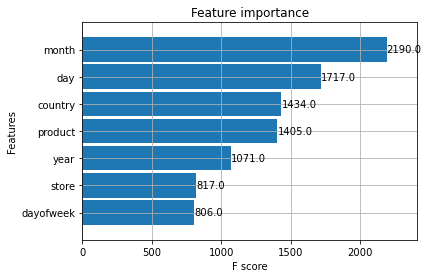

In [106]:
plot_importance(xgb, height=0.9)

In [107]:
cat_1 = CatBoostRegressor(verbose = 0, random_state = 42)
cat_1.fit(X_train, y_train)

In [108]:
vot = VotingRegressor(estimators=[('cat', cat_1), ('xgb', xgb), ('lgbm', lgbm)])
vot.fit(X_train, y_train)

VotingRegressor(estimators=[('cat',
                             <catboost.core.CatBoostRegressor object at 0x000002A79D31C400>),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=No...
                                          learning_rate=0.300000012,
                                          max_bin=256, max_cat_to_onehot=4,
                                          max_delta_step=0, max_depth=6,
                                          max_leaves=0, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=150, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=42, reg_alpha=0,
                                          reg_lambda=1, ...)),
                            ('lgbm',
                             LGBMRegressor(application='regression',
                                           n_estimators=150,
                                           random_state=42))])

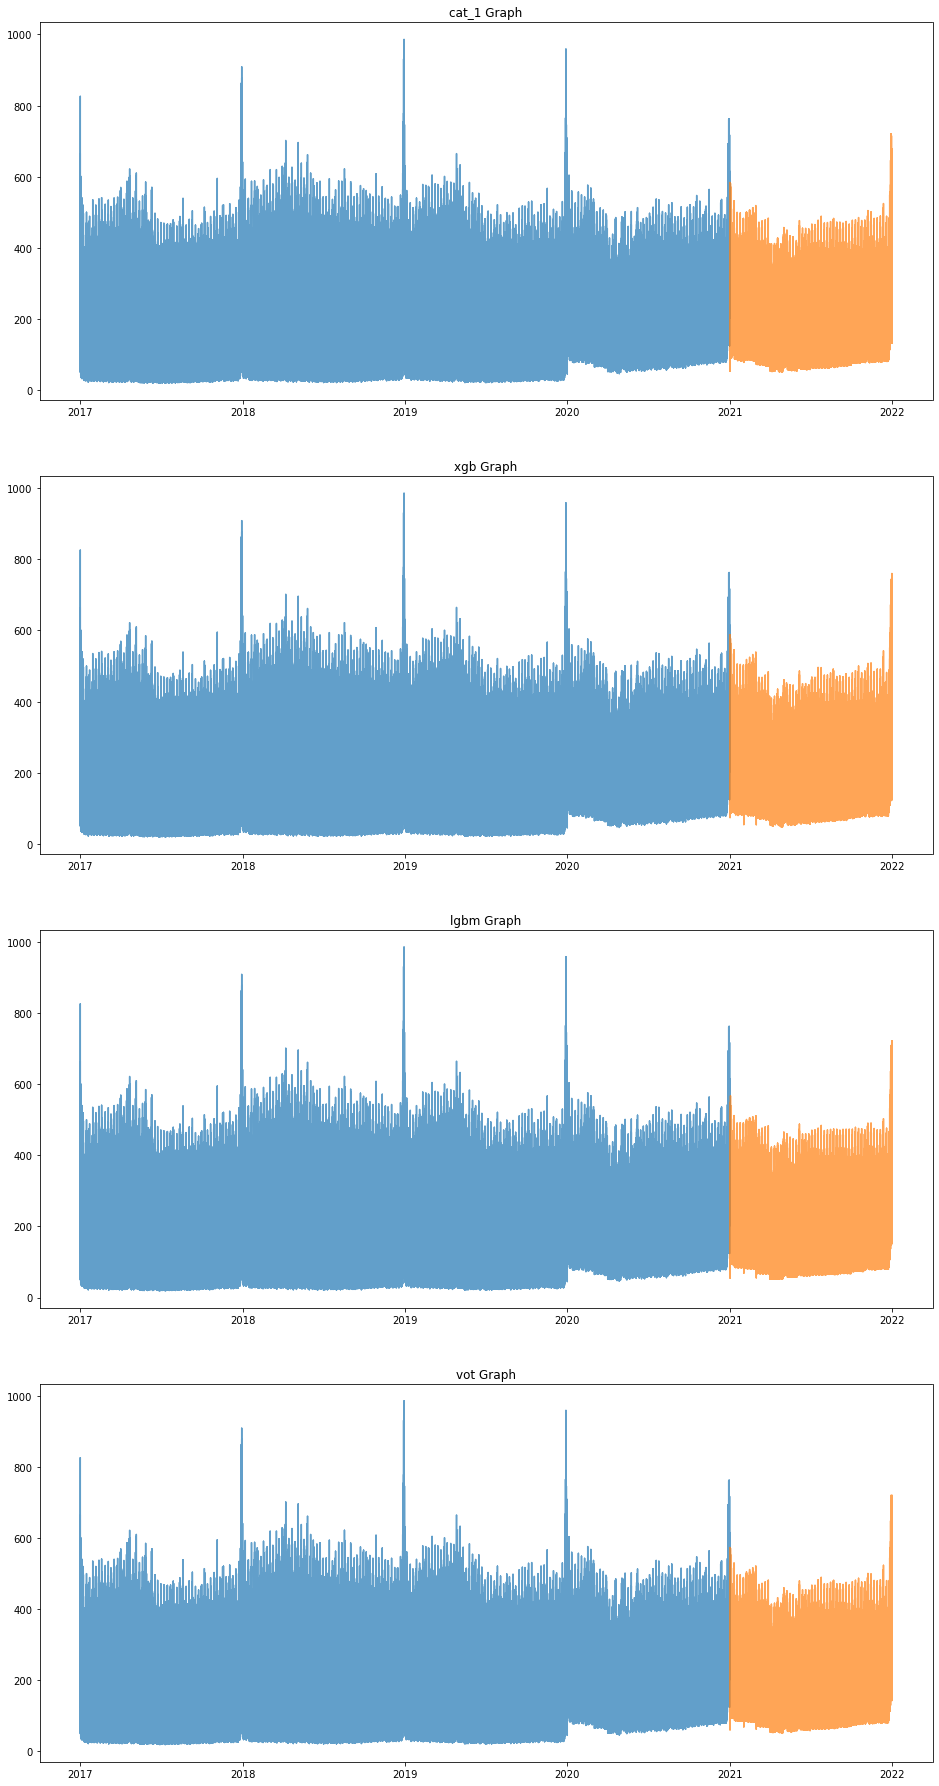

In [109]:
import matplotlib.pyplot as plt
cat_plot = cat_1.predict(test_drop)
xgb_plot = xgb.predict(test_drop)
lgbm_plot = lgbm.predict(test_drop)
vot_plot = vot.predict(test_drop)


plt.figure(figsize=(16,32))

plt.subplot(4, 1, 1)
plt.title('cat_1 Graph')
plt.plot(train['date'], y_train, test['date'], cat_plot, alpha = 0.7)

plt.subplot(4, 1, 2)
plt.title('xgb Graph')
plt.plot(train['date'], y_train, test['date'], xgb_plot, alpha = 0.7)

plt.subplot(4, 1, 3)
plt.title('lgbm Graph')
plt.plot(train['date'], y_train, test['date'], lgbm_plot, alpha = 0.7)

plt.subplot(4, 1, 4)
plt.title('vot Graph')
plt.plot(train['date'], y_train, test['date'], vot_plot, alpha = 0.7)
plt.show()

In [110]:
from sklearn.model_selection import cross_val_predict
print(cross_val_predict(cat_1, X_train, y_train, cv = 5).mean())
print(cross_val_predict(xgb, X_train, y_train, cv = 5).mean())
print(cross_val_predict(lgbm, X_train, y_train, cv = 5).mean())
print(cross_val_predict(vot, X_train, y_train, cv = 5).mean())

194.3012658345072
193.77687
193.5915674795427
193.88989649995926


In [111]:
# cross_val_predict(cat_2, X_train, y_train, cv = 10).mean()

In [112]:
# test_cate

In [113]:
predictions_1 = cat_1.predict(test_drop)
predictions_2 = xgb.predict(test_drop)
predictions_3 = lgbm.predict(test_drop)
predictions_4 = vot.predict(test_drop)
# predictions_2 = cat_2.predict(test_cate)

In [114]:
predictions_1

array([513.27130647, 413.6404031 , 365.56052815, ..., 170.64973478,
       145.37225435, 225.65943466])

In [115]:
predictions_2

array([510.30182, 420.24216, 362.55313, ..., 139.27776, 123.26744,
       201.01575], dtype=float32)

In [116]:
predictions_3

array([480.49699114, 372.53179627, 330.68293641, ..., 191.70324492,
       165.20368948, 237.85985877])

In [117]:
predictions_4

array([501.35670549, 402.13811878, 352.93219856, ..., 167.21024515,
       144.61446154, 221.51168017])

In [118]:
# predictions_2

In [119]:
output = pd.DataFrame({'row_id': test.row_id, 'num_sold': predictions_4})
output.to_csv('cat_xgb_lgbm.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
